PROGRAM 1

In [1]:
import re
from collections import defaultdict

# Sample documents
doc1 = "I am a student, and I currently take MDS472C. I was a student in MDS331 last trimester."
doc2 = "I was a student. I have taken MDS472C."
documents = [doc1, doc2]

# Tokenization and lowercase
def tokenize(text):
    return re.findall(r'\w+', text.lower())

# Build positional index
def build_positional_index(docs):
    index = defaultdict(lambda: defaultdict(list))
    for doc_id, doc in enumerate(docs, 1):
        tokens = tokenize(doc)
        for pos, word in enumerate(tokens):
            index[word][f"Doc{doc_id}"].append(pos)
    return index

# Build the index
pos_index = build_positional_index(documents)

# Query specific words
def query_words(words):
    for word in words:
        print(f"'{word}': {pos_index.get(word.lower(), 'Not found')}")

query_words(["student", "MDS472C"])


'student': defaultdict(<class 'list'>, {'Doc1': [3, 12], 'Doc2': [3]})
'MDS472C': defaultdict(<class 'list'>, {'Doc1': [8], 'Doc2': [7]})


PROGRAM 2

In [5]:
import pandas as pd
import re

# --- Input Documents ---
# Document 1
doc1 = "I am a student, and I currently take MDS472C. I was a student in MDS331 last trimester."

# Document 2
doc2 = "I was a student. I have taken MDS472C."

# Combine documents into a list for easier processing
documents = [doc1, doc2]

# --- Preprocessing and Vocabulary Creation ---

# Preprocess each document: convert to lowercase, remove punctuation, and split into words
# Using a set gets only the unique words for each document
doc1_words = set(re.sub(r'[^\w\s]', '', doc1).lower().split())
doc2_words = set(re.sub(r'[^\w\s]', '', doc2).lower().split())

# Create a master vocabulary of all unique words from all documents, sorted alphabetically
vocabulary = sorted(list(doc1_words.union(doc2_words)))

# --- Build the Word Matrix ---

# Initialize a dictionary to hold the matrix data
word_matrix_data = {}

# Populate the matrix data for Doc1
word_matrix_data['Doc1'] = [1 if word in doc1_words else 0 for word in vocabulary]

# Populate the matrix data for Doc2
word_matrix_data['Doc2'] = [1 if word in doc2_words else 0 for word in vocabulary]

# --- Create and Display the DataFrame ---

# Create a pandas DataFrame from the dictionary
# The 'index' parameter sets the row labels
df_word_matrix = pd.DataFrame(word_matrix_data, index=vocabulary)

# Transpose the DataFrame so documents are rows and terms are columns, matching the example
df_word_matrix = df_word_matrix.T

# Print the final word matrix
print("Word Matrix for Doc 1 and Doc 2:")
print(df_word_matrix)

Word Matrix for Doc 1 and Doc 2:
      a  am  and  currently  have  i  in  last  mds331  mds472c  student  \
Doc1  1   1    1          1     0  1   1     1       1        1        1   
Doc2  1   0    0          0     1  1   0     0       0        1        1   

      take  taken  trimester  was  
Doc1     1      0          1    1  
Doc2     0      1          0    1  


PROGRAM 3


In [2]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.metrics.distance import edit_distance
from collections import Counter

nltk.download('punkt')
nltk.download('wordnet')

# Custom preprocessing
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def full_preprocess(text):
    tokens = tokenize(text)
    normalized = [lemmatizer.lemmatize(stemmer.stem(token)) for token in tokens]
    return normalized

# Example documents
doc3 = "Machine learning allows systems to learn from data."
doc4 = "Learning from examples is a powerful method in data science."
corpus = [doc3, doc4]

# Processed tokens
processed = [full_preprocess(doc) for doc in corpus]

# Frequency index
freq_index = [Counter(doc) for doc in processed]
print("Frequency Index:")
for i, counter in enumerate(freq_index, 1):
    print(f"Doc{i}: {dict(counter)}")

# Sorted words by frequency
all_words = sum(processed, [])
word_freq = Counter(all_words)
sorted_words = word_freq.most_common()
print("\nSorted Words by Frequency:")
print(sorted_words)

# Edit distance between two words from the corpus
w1, w2 = "learn", "learning"
print(f"\nEdit distance between '{w1}' and '{w2}': {edit_distance(w1, w2)}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\genix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\genix\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Frequency Index:
Doc1: {'machin': 1, 'learn': 2, 'allow': 1, 'system': 1, 'to': 1, 'from': 1, 'data': 1}
Doc2: {'learn': 1, 'from': 1, 'exampl': 1, 'is': 1, 'a': 1, 'power': 1, 'method': 1, 'in': 1, 'data': 1, 'scienc': 1}

Sorted Words by Frequency:
[('learn', 3), ('from', 2), ('data', 2), ('machin', 1), ('allow', 1), ('system', 1), ('to', 1), ('exampl', 1), ('is', 1), ('a', 1), ('power', 1), ('method', 1), ('in', 1), ('scienc', 1)]

Edit distance between 'learn' and 'learning': 3


PROGRAM 4

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\genix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Aligned Words:
Word A   : characterization
Word B   : c-a-tegorization
Opertn   : *d*dssss********

Step-by-Step Operations:
Match       : c
Delete      : h
Match       : a
Delete      : r
Substitute  : a -> t
Substitute  : c -> e
Substitute  : t -> g
Substitute  : e -> o
Match       : r
Match       : i
Match       : z
Match       : a
Match       : t
Match       : i
Match       : o
Match       : n

Summary Report:
Total Minimum Edit Distance : 6
Number of Insertions        : 0
Number of Deletions         : 2
Number of Substitutions     : 4
Number of Matches           : 10


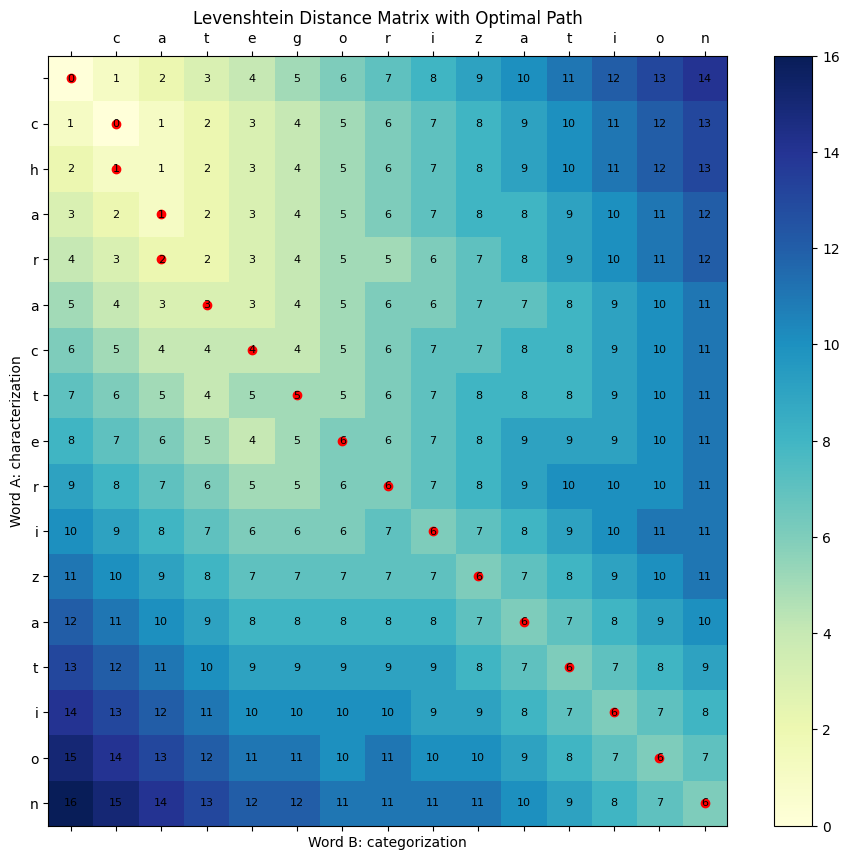

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

# Download tokenizer (used by NLTK functions if needed)
nltk.download('punkt')

def full_nltk_levenshtein(wordA, wordB):
    lenA, lenB = len(wordA), len(wordB)
    dp = np.zeros((lenA + 1, lenB + 1), dtype=int)

    # Initialize DP matrix
    for i in range(lenA + 1):
        dp[i][0] = i
    for j in range(lenB + 1):
        dp[0][j] = j

    # Fill the matrix
    for i in range(1, lenA + 1):
        for j in range(1, lenB + 1):
            cost = 0 if wordA[i - 1] == wordB[j - 1] else 1
            dp[i][j] = min(
                dp[i - 1][j] + 1,
                dp[i][j - 1] + 1,
                dp[i - 1][j - 1] + cost
            )

    # Backtrace path
    i, j = lenA, lenB
    path = [(i, j)]
    ops = []
    alignedA, alignedB, op_seq = [], [], []

    insertions = deletions = substitutions = matches = 0

    while i > 0 or j > 0:
        if i > 0 and j > 0 and dp[i][j] == dp[i - 1][j - 1] + (wordA[i - 1] != wordB[j - 1]):
            alignedA.append(wordA[i - 1])
            alignedB.append(wordB[j - 1])
            path.append((i - 1, j - 1))
            if wordA[i - 1] == wordB[j - 1]:
                op_seq.append('*')
                ops.append(f"Match       : {wordA[i - 1]}")
                matches += 1
            else:
                op_seq.append('s')
                ops.append(f"Substitute  : {wordA[i - 1]} -> {wordB[j - 1]}")
                substitutions += 1
            i -= 1
            j -= 1
        elif i > 0 and dp[i][j] == dp[i - 1][j] + 1:
            alignedA.append(wordA[i - 1])
            alignedB.append('-')
            path.append((i - 1, j))
            op_seq.append('d')
            ops.append(f"Delete      : {wordA[i - 1]}")
            deletions += 1
            i -= 1
        else:
            alignedA.append('-')
            alignedB.append(wordB[j - 1])
            path.append((i, j - 1))
            op_seq.append('i')
            ops.append(f"Insert      : {wordB[j - 1]}")
            insertions += 1
            j -= 1

    # Reverse alignments and operations
    path.reverse()
    ops.reverse()
    alignedA.reverse()
    alignedB.reverse()
    op_seq.reverse()

    # Print Outputs
    print("\nAligned Words:")
    print("Word A   :", ''.join(alignedA))
    print("Word B   :", ''.join(alignedB))
    print("Opertn   :", ''.join(op_seq))

    print("\nStep-by-Step Operations:")
    for step in ops:
        print(step)

    print("\nSummary Report:")
    print("Total Minimum Edit Distance :", dp[lenA][lenB])
    print("Number of Insertions        :", insertions)
    print("Number of Deletions         :", deletions)
    print("Number of Substitutions     :", substitutions)
    print("Number of Matches           :", matches)

    # Return matrix and path for plotting
    df = pd.DataFrame(dp, index=[" "] + list(wordA), columns=[" "] + list(wordB))
    return df, path

def plot_path(dp_df, path, wordA, wordB):
    fig, ax = plt.subplots(figsize=(12, 10))
    mat = ax.matshow(dp_df.values, cmap="YlGnBu")
    plt.colorbar(mat)

    ax.set_xticks(range(len(dp_df.columns)))
    ax.set_yticks(range(len(dp_df.index)))
    ax.set_xticklabels(dp_df.columns)
    ax.set_yticklabels(dp_df.index)

    for i in range(len(dp_df.index)):
        for j in range(len(dp_df.columns)):
            ax.text(j, i, str(dp_df.iat[i, j]), va='center', ha='center', fontsize=8)

    for i, j in path:
        ax.plot(j, i, 'ro')

    ax.set_title("Levenshtein Distance Matrix with Optimal Path")
    plt.xlabel("Word B: " + wordB)
    plt.ylabel("Word A: " + wordA)
    plt.show()

# === Run the Full Analysis ===
wordA = "characterization"
wordB = "categorization"

matrix, path = full_nltk_levenshtein(wordA, wordB)
plot_path(matrix, path, wordA, wordB)


PROGRAM 5

In [3]:
from collections import defaultdict, Counter
import math

# Step 1: Training Corpus with manually assigned POS tags
# Format: [(word, tag), ...]
training_sentences = [
    [('The', 'DET'), ('cat', 'NOUN'), ('chased', 'VERB'), ('the', 'DET'), ('rat', 'NOUN')],
    [('A', 'DET'), ('rat', 'NOUN'), ('can', 'MODAL'), ('run', 'VERB')],
    [('The', 'DET'), ('dog', 'NOUN'), ('can', 'MODAL'), ('chase', 'VERB'), ('the', 'DET'), ('cat', 'NOUN')]
]

# Step 2: Calculate Emission and Transition Counts
transition_counts = defaultdict(Counter)
emission_counts = defaultdict(Counter)
tag_counts = Counter()

for sentence in training_sentences:
    previous_tag = None
    for word, tag in sentence:
        tag_counts[tag] += 1
        emission_counts[tag][word.lower()] += 1
        if previous_tag:
            transition_counts[previous_tag][tag] += 1
        previous_tag = tag

# Step 3: Convert to Probabilities
def calculate_probabilities(counts_dict):
    probabilities = defaultdict(dict)
    for key in counts_dict:
        total = sum(counts_dict[key].values())
        for subkey in counts_dict[key]:
            probabilities[key][subkey] = counts_dict[key][subkey] / total
    return probabilities

transition_probs = calculate_probabilities(transition_counts)
emission_probs = calculate_probabilities(emission_counts)

# Step 4: Viterbi Algorithm (simplified for this small corpus)
tags = list(tag_counts.keys())

def viterbi(sentence):
    sentence = [word.lower() for word in sentence]
    V = [{}]
    path = {}

    # Initialization step
    for tag in tags:
        emission = emission_probs[tag].get(sentence[0], 1e-6)
        V[0][tag] = emission  # No prior, start probability assumed uniform
        path[tag] = [tag]

    # Recursion step
    for t in range(1, len(sentence)):
        V.append({})
        new_path = {}

        for curr_tag in tags:
            (prob, prev_tag) = max(
                (V[t-1][pt] * transition_probs[pt].get(curr_tag, 1e-6) * emission_probs[curr_tag].get(sentence[t], 1e-6), pt)
                for pt in tags
            )
            V[t][curr_tag] = prob
            new_path[curr_tag] = path[prev_tag] + [curr_tag]

        path = new_path

    # Termination step
    (prob, final_tag) = max((V[-1][tag], tag) for tag in tags)
    return path[final_tag]

# Step 5: Test Sentence
test_sentence = ["The", "rat", "can", "chase", "the", "cat"]
predicted_tags = viterbi(test_sentence)

# Output the tagged sentence
print("Tagged sentence:")
for word, tag in zip(test_sentence, predicted_tags):
    print(f"{word}/{tag}", end=" ")


Tagged sentence:
The/DET rat/NOUN can/MODAL chase/VERB the/DET cat/NOUN 

PROGRAM 6

In [4]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.wsd import lesk
from nltk import pos_tag, word_tokenize

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Helper: Convert POS tag to WordNet POS format
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wn.ADJ
    elif treebank_tag.startswith('V'):
        return wn.VERB
    elif treebank_tag.startswith('N'):
        return wn.NOUN
    elif treebank_tag.startswith('R'):
        return wn.ADV
    else:
        return None

# Step 1: Example Corpus (you can replace with newspaper lines)
corpus = [
    "The bank can guarantee deposits will eventually cover future tuition costs.",
    "He went to the bank to deposit his paycheck.",
    "The river overflowed the bank during the storm.",
    "They saw a bat flying in the dark.",
    "She held the bat tightly during the game."
]

# Step 2–5: Process each sentence
for sentence in corpus:
    print(f"\nSentence: {sentence}")
    tokens = word_tokenize(sentence)
    tagged = pos_tag(tokens)

    for word, tag in tagged:
        wn_pos = get_wordnet_pos(tag)
        if wn_pos:  # Open-class word
            senses = wn.synsets(word, pos=wn_pos)
            print(f"\nWord: {word} | POS: {tag} | Senses: {len(senses)}")

            for i, sense in enumerate(senses[:3], 1):  # Show up to 3 senses
                print(f"  Sense {i}: {sense.name()} – {sense.definition()}")

            # Apply Lesk algorithm
            lesk_sense = lesk(tokens, word, wn_pos)
            if lesk_sense:
                print(f"🔹 Predicted sense (Lesk): {lesk_sense.name()} – {lesk_sense.definition()}")
            else:
                print("🔹 No sense found by Lesk.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\genix\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\genix\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\genix\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\genix\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!



Sentence: The bank can guarantee deposits will eventually cover future tuition costs.

Word: bank | POS: NN | Senses: 10
  Sense 1: bank.n.01 – sloping land (especially the slope beside a body of water)
  Sense 2: depository_financial_institution.n.01 – a financial institution that accepts deposits and channels the money into lending activities
  Sense 3: bank.n.03 – a long ridge or pile
🔹 Predicted sense (Lesk): depository_financial_institution.n.01 – a financial institution that accepts deposits and channels the money into lending activities

Word: guarantee | POS: VB | Senses: 4
  Sense 1: guarantee.v.01 – give surety or assume responsibility
  Sense 2: guarantee.v.02 – make certain of
  Sense 3: undertake.v.03 – promise to do or accomplish
🔹 Predicted sense (Lesk): guarantee.v.04 – stand behind and guarantee the quality, accuracy, or condition of

Word: deposits | POS: NNS | Senses: 9
  Sense 1: deposit.n.01 – the phenomenon of sediment or gravel accumulating
  Sense 2: sediment.n